RMSE: 0.1344
R^2 Score: 0.7817


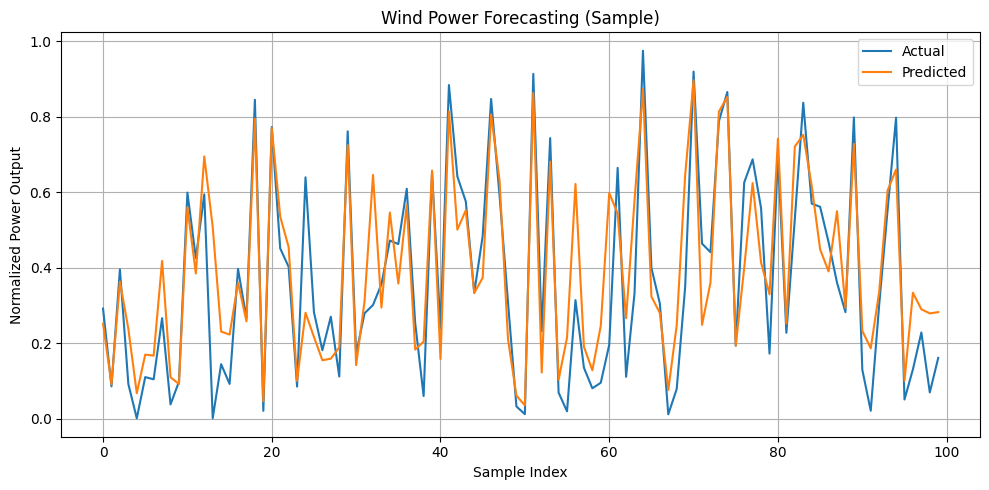

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data
file_path = 'Location1.csv'  # Ensure the file is in the same directory as this script
df = pd.read_csv(r"Location1.csv")


# Parse datetime and extract features
df['Time'] = pd.to_datetime(df['Time'])
df['hour'] = df['Time'].dt.hour
df['day'] = df['Time'].dt.day
df['month'] = df['Time'].dt.month
df['year'] = df['Time'].dt.year

# Drop original time column
df.drop(columns=['Time'], inplace=True)

# Check and drop missing values (or handle them appropriately)
df.dropna(inplace=True)

# Features and target
X = df.drop(columns=['Power'])
y = df['Power']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Visualization
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Wind Power Forecasting (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Power Output')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Processing Wind Farm - Location 1 (Location1.csv)...
RMSE: 0.1305
R^2 Score: 0.7943


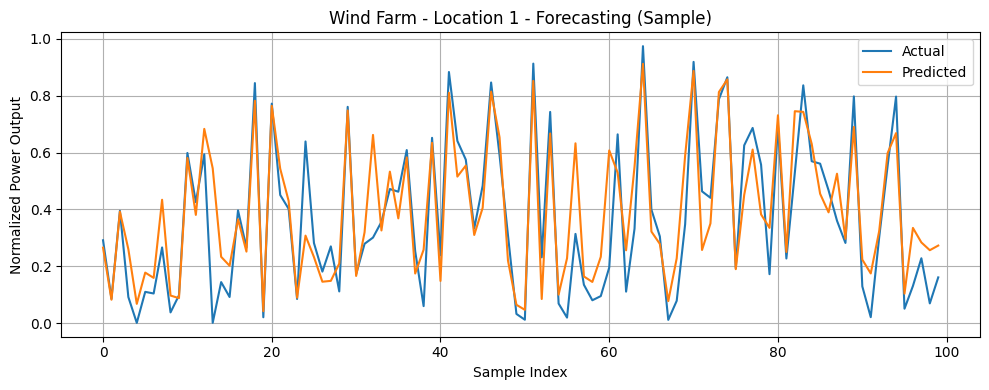

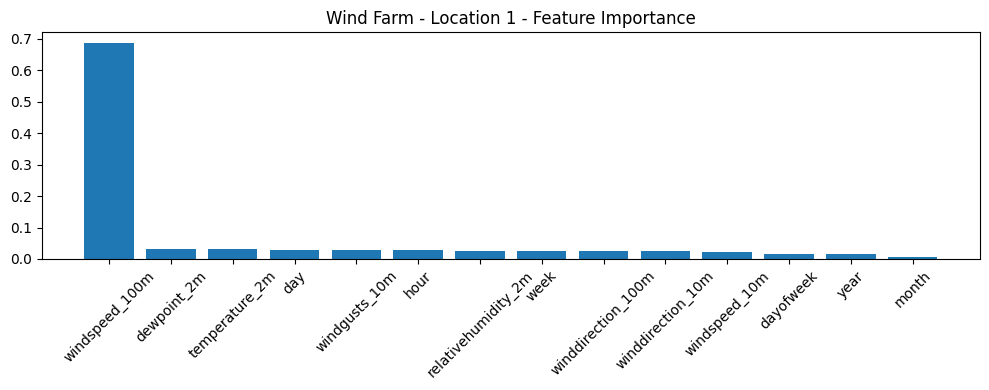

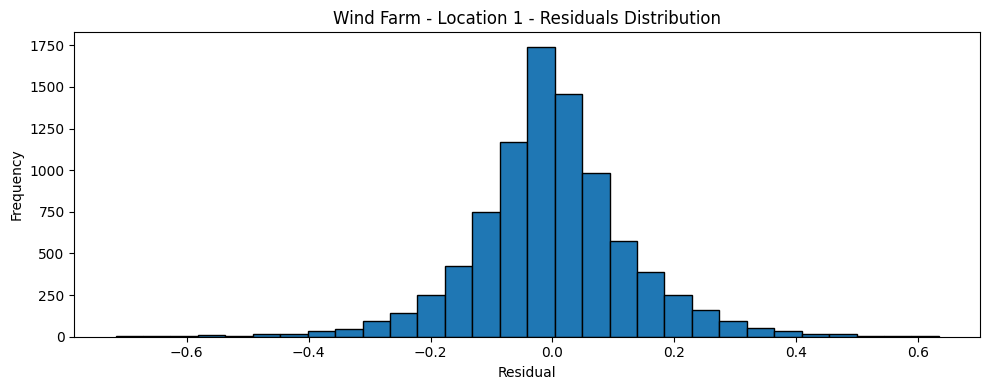

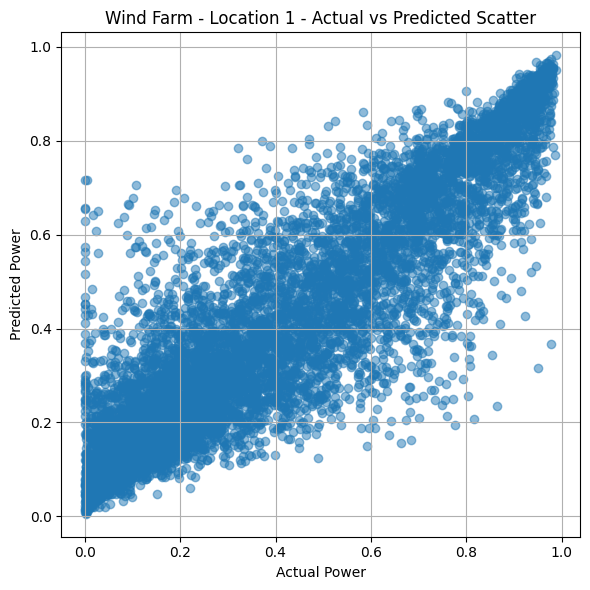

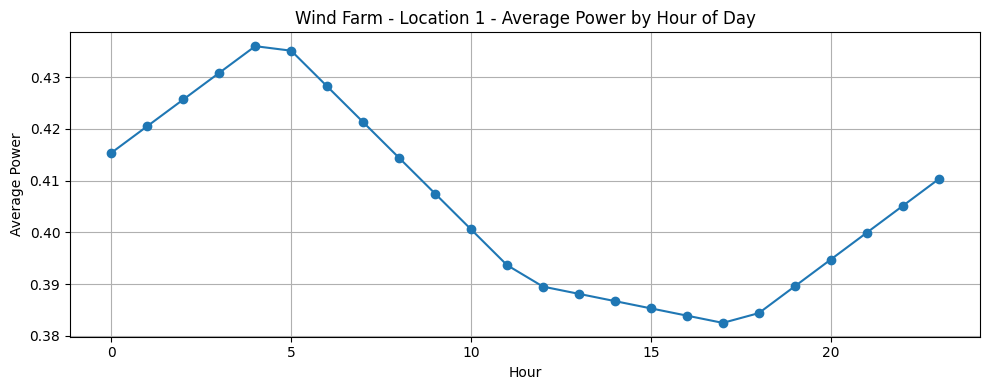

<Figure size 1000x400 with 0 Axes>

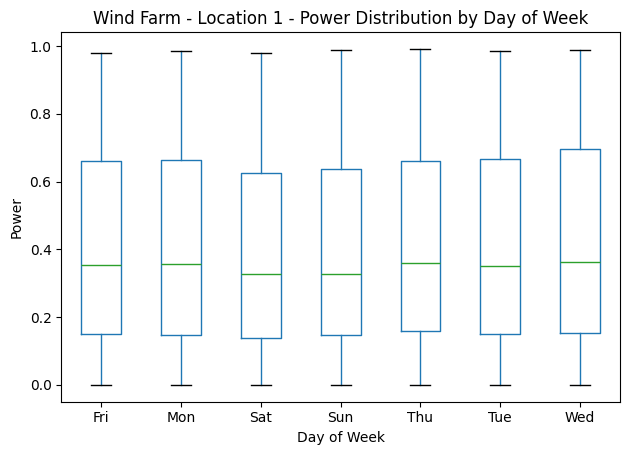


Processing Wind Farm - Location 2 (Location2.csv)...
RMSE: 0.0871
R^2 Score: 0.8302


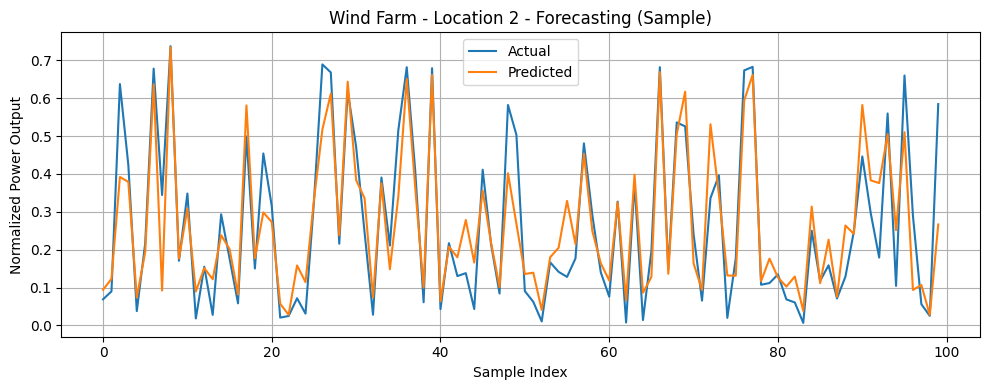

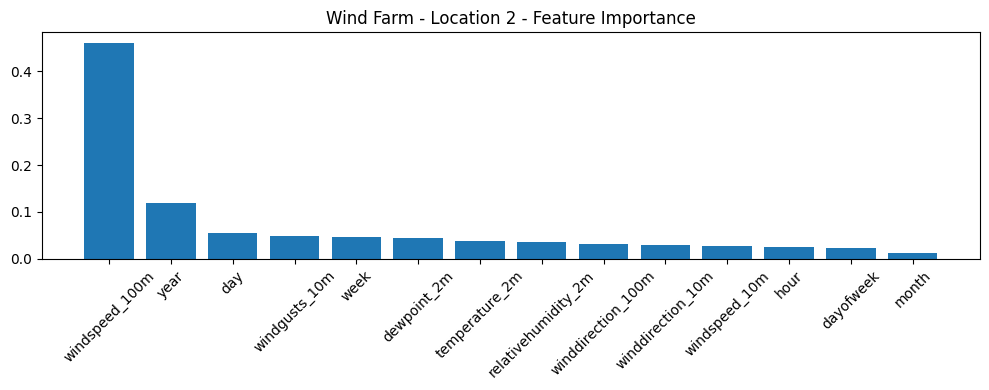

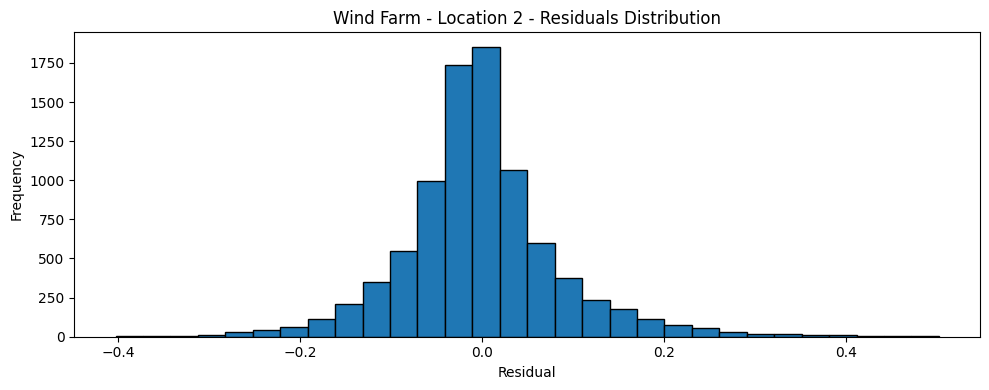

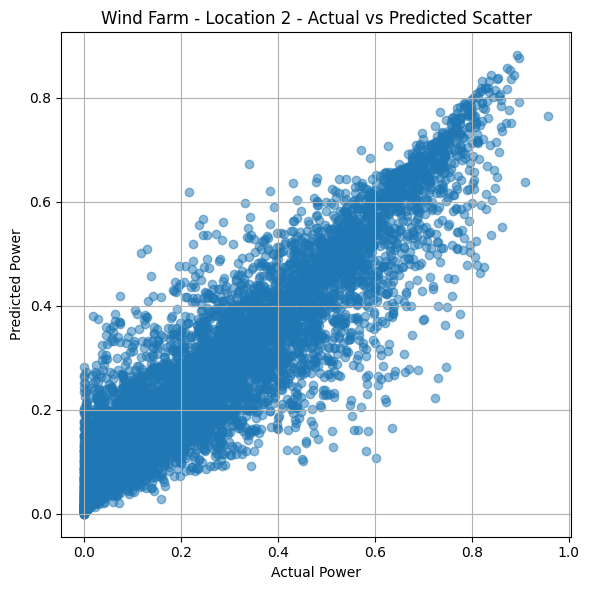

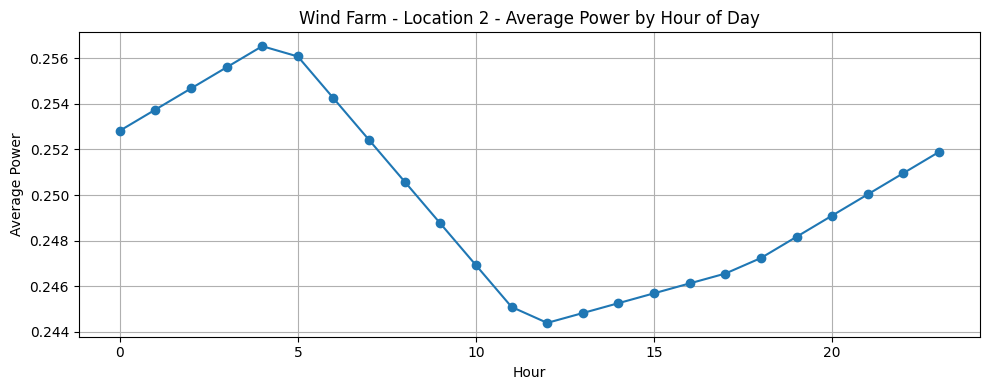

<Figure size 1000x400 with 0 Axes>

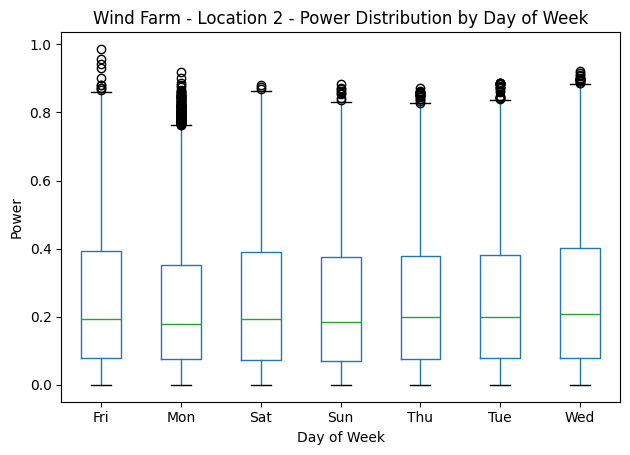


Processing Wind Farm - Location 3 (Location3.csv)...
RMSE: 0.1031
R^2 Score: 0.8497


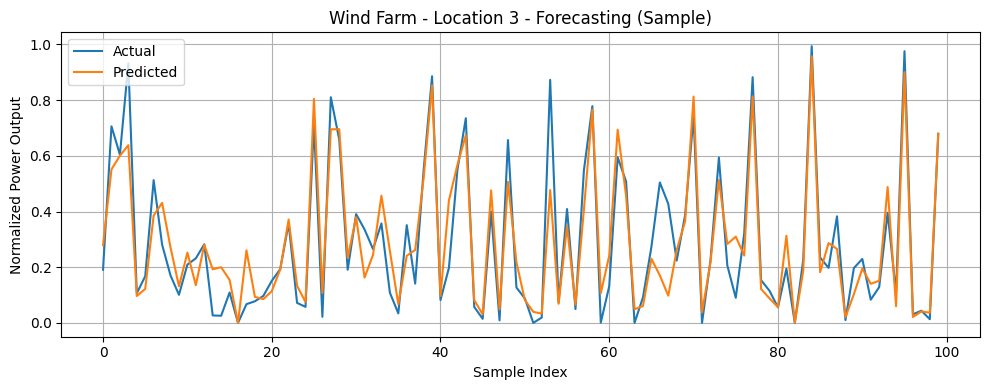

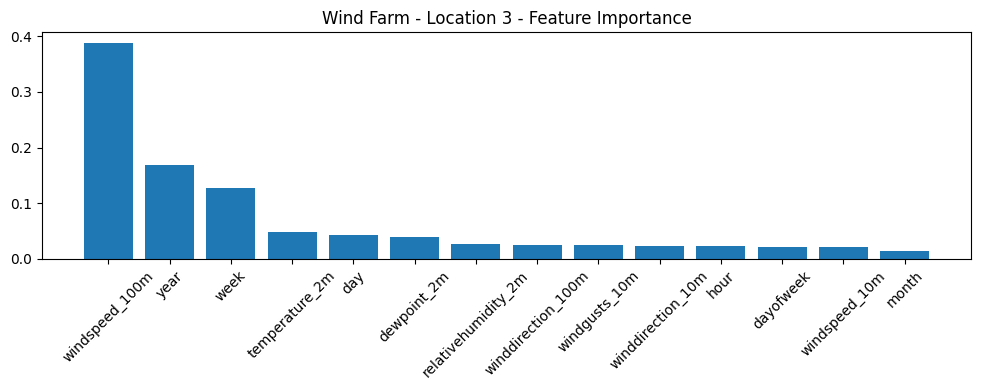

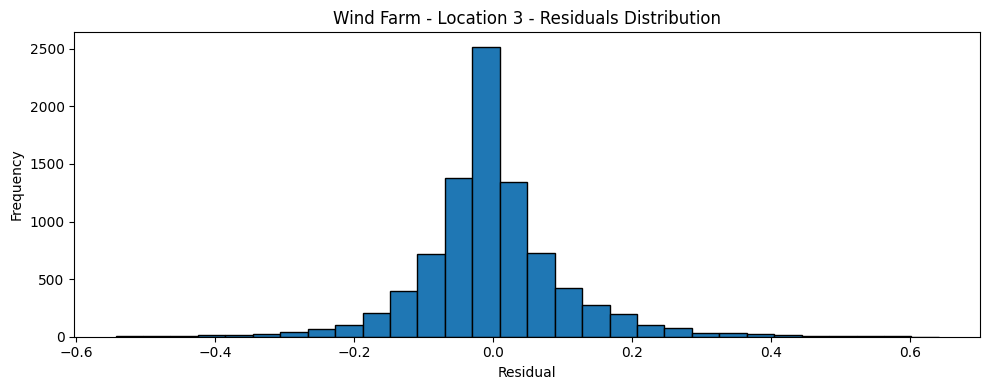

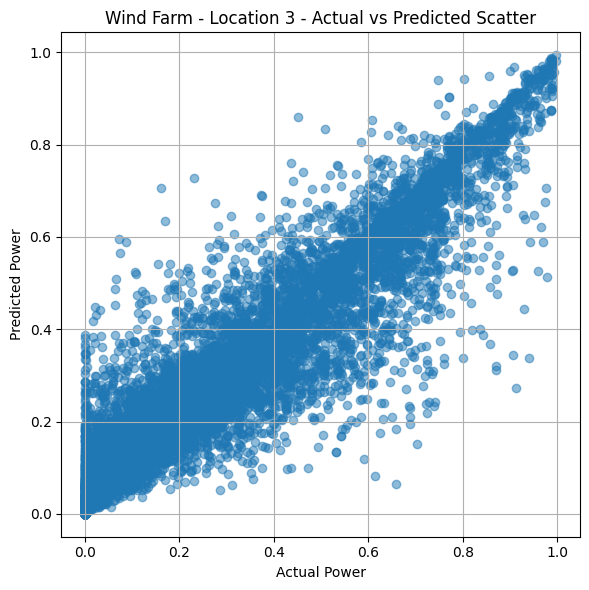

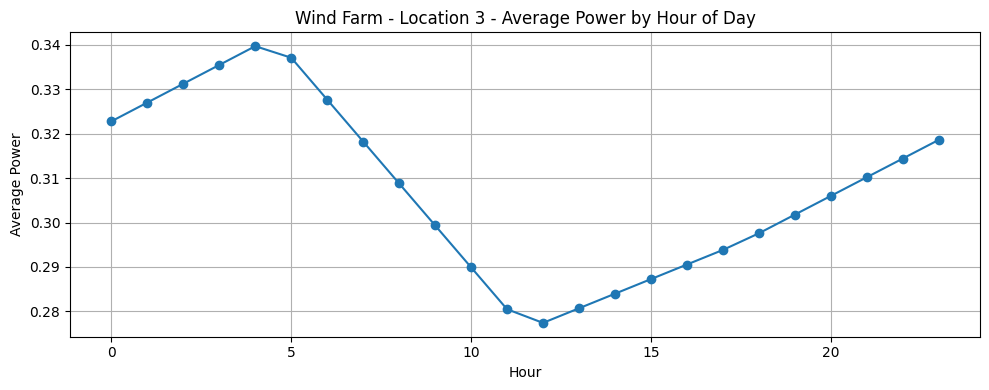

<Figure size 1000x400 with 0 Axes>

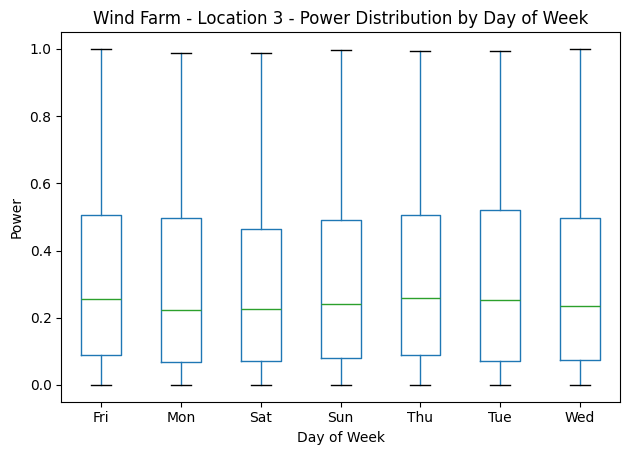


Processing Wind Farm - Location 4 (Location4.csv)...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import os

# List of dataset files with names
location_files = [
    ('Location1.csv', 'Wind Farm - Location 1'),
    ('Location2.csv', 'Wind Farm - Location 2'),
    ('Location3.csv', 'Wind Farm - Location 3'),
    ('Location4.csv', 'Wind Farm - Location 4')
]

# Function to process and plot for each location
def process_location(file_name, display_name):
    print(f"\nProcessing {display_name} ({file_name})...")
    df = pd.read_csv(file_name)
    df['Time'] = pd.to_datetime(df['Time'])
    df['hour'] = df['Time'].dt.hour
    df['day'] = df['Time'].dt.day
    df['month'] = df['Time'].dt.month
    df['year'] = df['Time'].dt.year
    df['dayofweek'] = df['Time'].dt.dayofweek
    df['week'] = df['Time'].dt.isocalendar().week.astype(int)
    df.drop(columns=['Time'], inplace=True)
    df.dropna(inplace=True)

    X = df.drop(columns=['Power'])
    y = df['Power']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

    # Plot 1: Actual vs Predicted
    plt.figure(figsize=(10,4))
    plt.plot(y_test.values[:100], label='Actual')
    plt.plot(y_pred[:100], label='Predicted')
    plt.title(f'{display_name} - Forecasting (Sample)')
    plt.xlabel('Sample Index')
    plt.ylabel('Normalized Power Output')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot 2: Feature Importance
    plt.figure(figsize=(10,4))
    importances = model.feature_importances_
    features = df.drop(columns=['Power']).columns
    indices = np.argsort(importances)[::-1]
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), features[indices], rotation=45)
    plt.title(f'{display_name} - Feature Importance')
    plt.tight_layout()
    plt.show()

    # Plot 3: Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10,4))
    plt.hist(residuals, bins=30, edgecolor='k')
    plt.title(f'{display_name} - Residuals Distribution')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Plot 4: Actual vs Predicted Scatter Plot
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Power')
    plt.ylabel('Predicted Power')
    plt.title(f'{display_name} - Actual vs Predicted Scatter')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot 5: Time-based Power trend (on full data)
    if 'hour' in df.columns:
        df_grouped = df.groupby('hour')['Power'].mean()
        plt.figure(figsize=(10,4))
        plt.plot(df_grouped.index, df_grouped.values, marker='o')
        plt.title(f'{display_name} - Average Power by Hour of Day')
        plt.xlabel('Hour')
        plt.ylabel('Average Power')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Plot 6: Boxplot of Power by Day of Week
    plt.figure(figsize=(10,4))
    df['dayofweek'] = df['dayofweek'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
    df.boxplot(column='Power', by='dayofweek', grid=False)
    plt.title(f'{display_name} - Power Distribution by Day of Week')
    plt.suptitle('')
    plt.xlabel('Day of Week')
    plt.ylabel('Power')
    plt.tight_layout()
    plt.show()

# Loop through each location file and process it
for file, name in location_files:
    if os.path.exists(file):
        process_location(file, name)
    else:
        print(f"File not found: {file}")
